# 🚀 Real Estate - advanced estimator

❗️ In the previous challenge, we saw that if we have more flats than features  in our dataset ($\large n$ observations $\large> p$ features), that's why we can't "solve" the equation $\large X\theta = Y$. And without a deterministic formula for $\large \theta$, we would no longer be able to predict the prices of new flats anymore...!

----

🎯 In this exercise, we have now access to a bigger dataset consisting of 1000 flats and we want to refine our prediction for the same new flat as before:

- `Surface`: 3000 $ft^2$
- `Bedrooms`: 5 
- `Floors`: 1

❌ Instead of solving $\large X\theta = Y$ with a matrix $\large X$ of shape $ (1000,4)$ that is **`non-invertible`**...

🚀 ...We will find $\large {\theta} = \begin{bmatrix}
     \theta_0 \\
     \theta_1 \\
    \theta_2 \\
     \theta_3
\end{bmatrix}_{4 \times 1}$ that minimizes the error $ \large e = X\hat{\theta} - Y $: this approach is called a **`Linear Regression model`**. We will measure this error $e$ using the Euclidian distance $\large \left\|e\right\|$ and the **`Mean Squared Error.`**

👉 Let's compute $\large \hat{\theta}$ to find an approximate estimation of the new flat's price.


In [17]:
# Import some "default" libraries

# You can now use Pandas to manipulate the Dataframe conveniently

''' Data manipulation'''
#import pandas and numpy
#YOUR CODE
import pandas as pd
import numpy as np

''' Data visualization'''
#import seaborn and pyplot(matplotlib)
#YOUR CODE
import matplotlib.pyplot as plt
import seaborn as sn

## (1) Data Exploration

We load the dataset **flats.csv** below

In [18]:
#YOUR CODE
df = pd.read_csv("flats.csv")
df

,price,bedrooms,surface,floors
0,274.0,3,1830,2.0
1,500.0,4,2120,1.0
2,320.0,3,1260,1.0
3,445.5,3,1880,1.0
4,637.5,3,1680,1.0
...,...,...,...,...
995,700.0,9,3680,2.0
996,272.0,3,1528,2.0
997,350.0,3,1050,1.0
998,649.0,4,2980,2.0


👀 Use `scatterplots` to  figure out visually <u><i>which feature gives the most information about prices:</i></u>

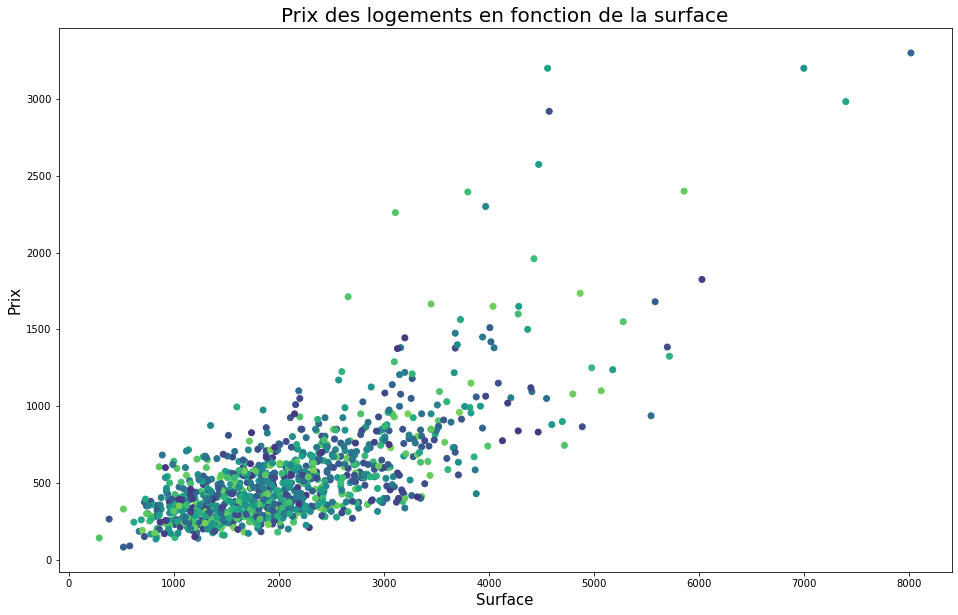

In [19]:
# Your plots here
#YOUR CODE
# make the data



x = df.surface
y = df.price
colors = np.random.uniform(15, 80, len(x))

# plot
plt.figure(figsize=(16,10))
plt.title("Prix des logements en fonction de la surface", fontsize = 20)
plt.xlabel("Surface",fontsize = 15)
plt.ylabel("Prix",fontsize = 15)
fig1 = plt.scatter(x, y, c=colors, vmin=0, vmax=100)
plt.show()




👉 It seems that `surface` is a stronger indicator of price than the number of bedrooms or floors. In statistics, we say that `price` is more **correlated** with `surface` than with other features. 

👉 Let's double-check this by running [`pandas.DataFrame.corr`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html) below, which computes correlation coefficients between each pair of columns of the DataFrame. 

<i> <u>Remarkable values:</u></i>
* 1 means that the two columns  are perfectly  correlated 📈 
* -1 means that the two columns perfectly inversely correlated 📉 
* 0 means that the two columns not *linearly* correlated 😐
    
<details>
    <summary><i>Why do we use the correlation coefficient and not the covariance coefficient ?</i></summary>
    
✅ <u>Similitudes</u>:
    
* 📈 Positive correlations and positive covariances between two variables X and Y mean the same thing: When X increases, Y increases and vice-versa. When X decreases, Y decreases and vice-versa.
    
* 📉 Negative correlations and negative covariances between two variables X and Y mean the same thing: When X increases, Y decreases and vice-versa. When X decreases, Y increases and vice-versa
    
* 🤔 A null correlation and a null covariance between two variables X and Y mean the same thing: 
    * They are _not linearly correlated_ in a sense that there would exists two real numbers $a$ and $b$  such that $ Y = aX + b$ 
    * However, they can still have another type of relation such as $Y = X^{2}$ (quadratic relation), $Y = e^{X}$ (exponential relation), $Y = ln(X)$ (logarithmic relation), $Y = sin(\sqrt{1+X^7})$ (super weird relation), ...
    
❗️ <u>Main difference</u>:
    
* 😖 The covariance between two variables X and Y can be infinitely big positively or negatively : $ cov(X,Y) \in ( - \infty ; + \infty ) $
    
    * _Example_: if $ cov (X,Y) = 10 $ and $ cov (X,Z) = 30 $, can you say that X and Z are "more correlated" ? ❌_Hell No !_ 
    * You cannot compare apples, oranges and bananas. 

* 🧑🏻‍🏫 How to solve this problem ?
    * Consider the correlation instead, often denoted by the Greek Letter $\rho$ (pronounce `"rhô"`)
    
👉<u>Consequence</u>:
  
* You can view the correlation as a _standardized covariance_, we simply divide the covariance by both the standard deviation of $X$ and the standard deviation of $Y$    
$$ \large  \rho(X,Y) = \frac{cov(X,Y)}{\sigma_X \sigma_Y} \in [0;1]$$
    
    *  _Let's continue our example_: suppose now that $ \rho(X,Y) = 0.80 $ and $ \rho(X,Z) = 0.15 $, would you still want to say that X and Z are more correlated ? No. Actually, X and Y are more correlated than X and Z !
</details>

In [20]:
#YOUR CODE
df.corr()

,price,bedrooms,surface,floors
price,1.000000,0.239623,0.732790,0.258263
bedrooms,0.239623,1.000000,0.417170,0.131993
surface,0.732790,0.417170,1.000000,0.357512
floors,0.258263,0.131993,0.357512,1.000000


🎨 For a quicker glimpse of this matrix, you can use a **heatmap** from [`seaborn.heatmap`](https://seaborn.pydata.org/generated/seaborn.heatmap.html)

<details>
    <summary><i>Additional tips to display a nicer correlation matrix</i></summary>

* **`cmap`**: *Seaborn* being a visualisation library built on top of *Matpotlib*, you can use the argument [*cmap*](https://matplotlib.org/stable/tutorials/colors/colormaps.html) which stands for _color map_ to use 

* **`annot`** : To read the correlations even faster, you can show the correlation coefficients directly on the colored heatmap
   
* **`annot_kws`** : You can customize how the correlation coefficients appear
</details>

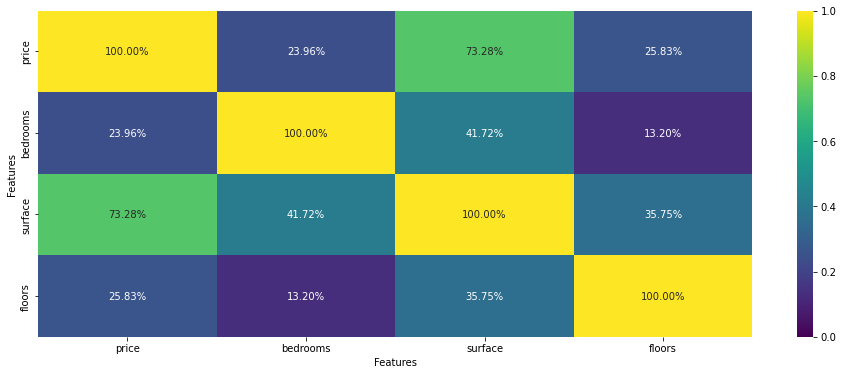

In [21]:
#YOUR CODE 
plt.figure(figsize=(16, 6))
heatmap = sn.heatmap(df.corr(), fmt=".2%", vmin=0, vmax=1, annot=True, cmap = plt.colormaps['viridis'])
heatmap.set(xlabel="Features", ylabel="Features")
plt.show()

## (2) Estimator with 1 feature

Let's try to build a statistical estimator of **price**  as a function of  only one feature, the **surface**.

🎯 Let's try to fit a **linear regression** between the two variables.

Practically speaking, we want to choose the best parameters $\hat{\theta}$ = (`slope`, `intercept`) such that the `predicted price = slope * surface + intercept` is as close as possible to the `price` in terms of Mean Squared Errors.

📅 During the next weeks, we will discover and study different models (Linear Regression, KNN, Logistic Regression, Neural Networks, etc.). 

👉 An important part of your job is to choose the right model and optimizing the parameters to make the best predictions.

### (2.1) Visual approach

❓ Implement the function `plot_line(slope, intercept, ax)` 
* This function plots a line with the `slope` and `intercept` arguments on the `ax` figure. We added the argument ax, so that you can plot the line(s) on your scatterplot.
* When you are done with coding the function, play with different values of `(slope, intercept)` until you find a “good linear approximation” of the data. Can you find the best fit ?

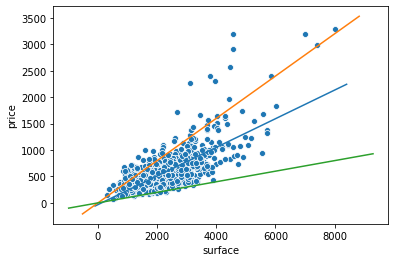

<img src='Capture.png'/>

In [22]:
# slope = pente  
#intercept = point d'intersection de l'axe x ou y

def plot_line(slope, intercept, df) :
    """Plot a line from slope and intercept on the ax"""     
    x = df.surface
    y = df.price
    colors = np.random.uniform(15, 80, len(x))
    # plot
    plt.figure(figsize=(16,10))
    plt.xlabel("Surface",fontsize = 15)
    plt.ylabel("Prix",fontsize = 15)
    fig1 = plt.scatter(x, y, c=colors, vmin=0, vmax=100)
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '--', c='red')
    


    


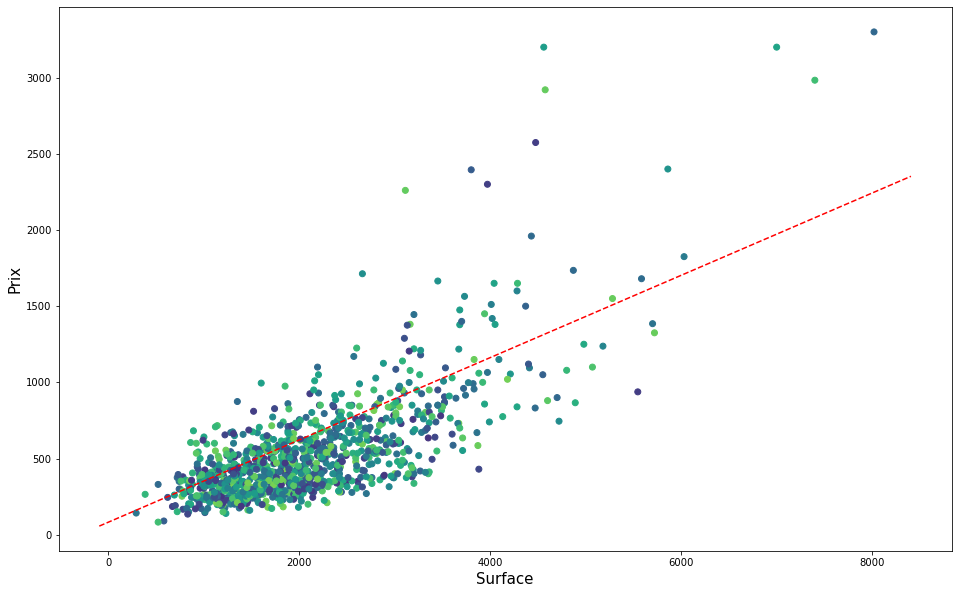

In [24]:
# TO DO: play with slopes and intercepts to get the best fit

plot_line(0.27, np.min(df.price), df)

😅 Not so easy (and not very “scientific”), right?

### (2.2) Computational approach

🔥 To make sure that our estimator line is the best possible one, we need to compute  the **Mean Squared Error** between the **real prices** and the **predicted prices**!

👉 Remember that :

* For each appartment, `predicted_price = slope * surface + intercept`
* Both the **vector of real prices** and the **vector of predicted prices** are of shape $ (1000,1)$

#### (2.2.1) Squared Errors

<u><b>Step 1</b></u>

❓For each row (_i.e. flat_), we should evaluate the `squared_error = (price - predicted_price)**2` ❓

In [29]:
def squared_errors(slope, intercept, surfaces, prices):
    """TO DO: return an array containing the squared errors between 
    all real prices from the dataset and the predicted prices
    """
    #YOUR CODE
    se_list = []
    for i in range(len(prices)):
        predicted_price = slope * surfaces[i] + intercept
        se_list.append( (prices[i] - predicted_price) ** 2)
    return se_list



se_list = squared_errors(0.27, np.min(df.price), x, y)

In [30]:
print(se_list)

[91566.76000000001, 23994.010000000028, 10547.29000000001, 20909.160000000007, 10281.959999999995, 129312.16000000002, 27688.96000000001, 13665.609999999995, 2872.9600000000023, 101888.64000000003, 99036.09000000003, 1655082.25, 184.95999999999907, 15675.040000000012, 3445.689999999992, 333737.29000000004, 54943.360000000015, 85556.25, 86200.96, 75680.01000000001, 4914.010000000019, 104006.25, 22380.160000000007, 32112.640000000018, 136530.25, 6839.290000000007, 2391.2099999999978, 52212.25, 9623.610000000004, 97001.10250000007, 2190.240000000001, 1142.4399999999969, 176450.40360000005, 6146.559999999997, 88982.89000000004, 38259.36000000001, 13356.656041000013, 146727.30250000002, 11881.0, 25344.640000000014, 2368.7689000000014, 34139.9529, 78120.25, 2964.802500000005, 176232.04000000015, 855.5625, 7542.922500000004, 209672.4100000001, 160240.09000000005, 34.22250000000027, 620.0099999999989, 172474.09000000005, 34132.56250000002, 83405.44000000005, 1506756.2499999995, 12067.022500000

💡 A general principle in Data Science / Modelling is that $ \large error = f(y, \hat{y})$ where:

* $ \large y$ is the real value
* $ \large \hat{y} $ the predicted valute
* $ \large f$ is often called a **Loss Function** or a **Cost Function** 
 

#### (2.2.2) Mean Squared Errors (MSE)

<u><b>Step 2</b></u>

❓ Create the `mse` function which should return the mean of the array returned by the `squared_errors` function. ❓

def mse(slope, intercept, surfaces, prices):
    '''TO DO: Return the mean of the array contained in squared_errors as a float.'''
   #YOUR CODE

👉 In section _(2.1) Visual approach_, you visually tried to estimate the "best line", which consists in finding the best pair `(slope, intercept)`. 

❓Using this "best pair", compute the MSE of your estimator. ❓

In [31]:
def mse(slope, intercept, surfaces, prices):
    return np.mean(squared_errors(slope,intercept,surfaces,prices))


### (2.3) Finding the best parameters

👉 Keep playing with different values for `slope` and `intercept` and try to get the best fit by hand!  Notice how hard it is to optimize both parameters at the same time.


👇 Follow the steps down below to get an idea of one potential approach:

#### (2.3.1) Finding the `best slope`

<b><i><u> Step 1 :</u></i></b>

Start by fixing an  `initial_intercept` with your best estimate, then find a slope which approximately minimizes the function  `mse=f(slope)`

In [32]:
# Define an initial_intercept, for instance, we may suppose there is always a small transaction fee even for very small flats?
#YOUR CODE
initial_intercept = np.min(df.price)



In [33]:
# Create a range of 100 slopes which contains what you believe is the optimal slope (hint: np.linspace())
#YOUR CODE
slopes = np.linspace(0.12,0.45,100)
slopes

array([0.12      , 0.12333333, 0.12666667, 0.13      , 0.13333333,
       0.13666667, 0.14      , 0.14333333, 0.14666667, 0.15      ,
       0.15333333, 0.15666667, 0.16      , 0.16333333, 0.16666667,
       0.17      , 0.17333333, 0.17666667, 0.18      , 0.18333333,
       0.18666667, 0.19      , 0.19333333, 0.19666667, 0.2       ,
       0.20333333, 0.20666667, 0.21      , 0.21333333, 0.21666667,
       0.22      , 0.22333333, 0.22666667, 0.23      , 0.23333333,
       0.23666667, 0.24      , 0.24333333, 0.24666667, 0.25      ,
       0.25333333, 0.25666667, 0.26      , 0.26333333, 0.26666667,
       0.27      , 0.27333333, 0.27666667, 0.28      , 0.28333333,
       0.28666667, 0.29      , 0.29333333, 0.29666667, 0.3       ,
       0.30333333, 0.30666667, 0.31      , 0.31333333, 0.31666667,
       0.32      , 0.32333333, 0.32666667, 0.33      , 0.33333333,
       0.33666667, 0.34      , 0.34333333, 0.34666667, 0.35      ,
       0.35333333, 0.35666667, 0.36      , 0.36333333, 0.36666

In [34]:
# Create the list of MSEs for each slope value
# YOUR CODE
mses = [mse(slopes[i], initial_intercept, df.surface, df.price) for i in range(len(slopes))]
mses

[124074.75936790701,
 120235.36407125145,
 116516.05514555147,
 112916.832590807,
 109437.6964070181,
 106078.64659418479,
 102839.683152307,
 99720.80608138478,
 96722.01538141811,
 93843.31105240699,
 91084.69309435146,
 88446.16150725144,
 85927.716291107,
 83529.35744591811,
 81251.08497168479,
 79092.898868407,
 77054.79913608478,
 75136.78577471811,
 73338.858784307,
 71661.01816485143,
 70103.26391635145,
 68665.59603880701,
 67348.0145322181,
 66150.51939658477,
 65073.110631907,
 64115.788238184774,
 63278.55221541811,
 62561.40256360701,
 61964.33928275145,
 61487.362372851436,
 61130.471833907,
 60893.66766591811,
 60776.94986888478,
 60780.318442807,
 60903.77338768478,
 61147.31470351811,
 61510.94239030699,
 61994.65644805144,
 62598.45687675145,
 63322.343676407,
 64166.316847018104,
 65130.376388584795,
 66214.522301107,
 67418.75458458478,
 68743.07323901811,
 70187.47826440701,
 71751.96966075143,
 73436.54742805145,
 75241.21156630701,
 77165.9620755181,
 79210.79895

❓ Plot MSEs vs. slopes. Do you see a minimum ❓

🙃 If not, try another range of slopes!

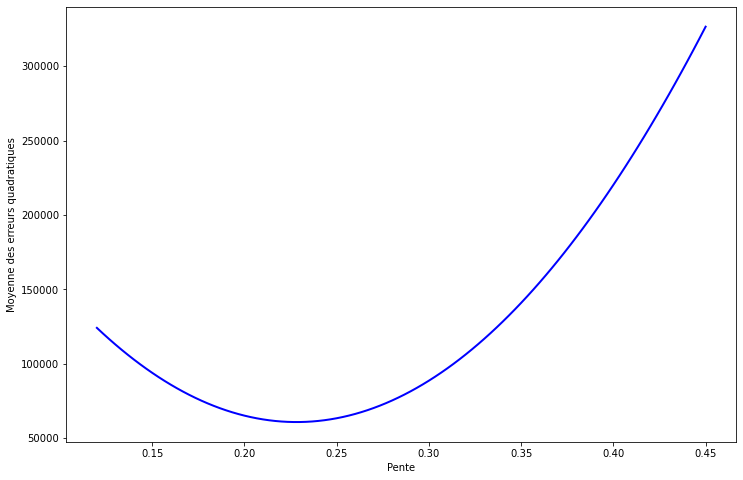

In [35]:
plt.figure(figsize=(12,8))
plt.plot(slopes,mses, c='blue', lw=2)
plt.xlabel('Pente')
plt.ylabel('Moyenne des erreurs quadratiques')
plt.savefig('figure.png') # /!\ ne fonctionne pas mettre après show
plt.show()#YOUR CODE

### ❓ Compute the minimum value of MSE for your `initial_intercept`, and the corresponding `slope_best` value ❓
<br>
<details>
    <summary><i>Hint</i></summary>
    
Here you can use Python's built-in `.min()` function, as well as `List.index()` method
    
</details>

In [36]:
#YOUR CODE
mse_best = np.min(mses)
slope_best = slopes[mses.index(mse_best)]
print('Le plus petit mse trouvé est de {} correspondant à une pente de {}'.format(mse_best,slope_best))

Le plus petit mse trouvé est de 60776.94986888478 correspondant à une pente de 0.22666666666666668


#### (2.3.2) Finding the `best intercept`

<b><i><u> Step 2 :</u></i></b>

🔨 Let's now fix the slope to that `slope_best` value, then re-use the previous approach to find "the" `intercept_best`.

In [37]:
# Create a range of 100 intercepts which contains what you believe is the optimal intercept
# YOUR CODE 
intercepts = np.linspace(-100,300,100)
intercepts

array([-100.        ,  -95.95959596,  -91.91919192,  -87.87878788,
        -83.83838384,  -79.7979798 ,  -75.75757576,  -71.71717172,
        -67.67676768,  -63.63636364,  -59.5959596 ,  -55.55555556,
        -51.51515152,  -47.47474747,  -43.43434343,  -39.39393939,
        -35.35353535,  -31.31313131,  -27.27272727,  -23.23232323,
        -19.19191919,  -15.15151515,  -11.11111111,   -7.07070707,
         -3.03030303,    1.01010101,    5.05050505,    9.09090909,
         13.13131313,   17.17171717,   21.21212121,   25.25252525,
         29.29292929,   33.33333333,   37.37373737,   41.41414141,
         45.45454545,   49.49494949,   53.53535354,   57.57575758,
         61.61616162,   65.65656566,   69.6969697 ,   73.73737374,
         77.77777778,   81.81818182,   85.85858586,   89.8989899 ,
         93.93939394,   97.97979798,  102.02020202,  106.06060606,
        110.1010101 ,  114.14141414,  118.18181818,  122.22222222,
        126.26262626,  130.3030303 ,  134.34343434,  138.38383

In [38]:
# Create the list of MSEs for each intercept value
# YOUR CODE
mses = [mse(slope_best, intercepts[i], df.surface, df.price) for i in range(len(intercepts))]
mses

[88214.41000721809,
 86885.91771108506,
 85590.07514457144,
 84326.88230767724,
 83096.33920040246,
 81898.44582274715,
 80733.20217471122,
 79600.60825629473,
 78500.66406749765,
 77433.36960832003,
 76398.72487876182,
 75396.72987882304,
 74427.38460850368,
 73490.68906780376,
 72586.64325672326,
 71715.24717526218,
 70876.50082342053,
 70070.40420119831,
 69296.9573085955,
 68556.16014561216,
 67848.0127122482,
 67172.51500850369,
 66529.6670343786,
 65919.46878987293,
 65341.920274986696,
 64797.02148971989,
 64284.77243407251,
 63805.17310804455,
 63358.223511636024,
 62943.923644846924,
 62562.273507677244,
 62213.27310012699,
 61896.92242219616,
 61613.221473884776,
 61362.1702551928,
 61143.768766120265,
 60958.01700666714,
 60804.914976833454,
 60684.46267661919,
 60596.66010602436,
 60541.507265048946,
 60519.004153692964,
 60529.150771956396,
 60571.94711983927,
 60647.39319734157,
 60755.48900446329,
 60896.234541204445,
 61069.62980756502,
 61275.674803545015,
 61514.36952

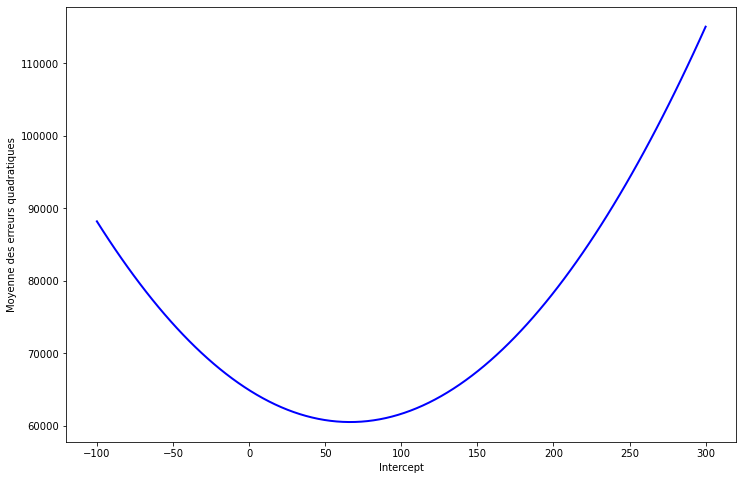

In [39]:
# Plot MSEs against slopes. Do you see a minimum? If not, try another range of slopes!
# YOUR CODE
plt.figure(figsize=(12,8))
plt.plot(intercepts,mses, c='blue', lw=2)
plt.xlabel('Intercept')
plt.ylabel('Moyenne des erreurs quadratiques')
plt.savefig('figure.png') # /!\ ne fonctionne pas mettre après show
plt.show()#YOUR CODE

❓ Compute `mse_min`, the minimum value of MSEs when slope is equal to `slope_best` best, and store the corresponding best intercept as `intercept_best` ❓


In [40]:
mse_best = np.min(mses)
intercept_best = intercepts[mses.index(mse_best)]
print('Le plus petit mse trouvé est de {} correspondant à l\'ordonnée {}'.format(mse_best,intercept_best))

Le plus petit mse trouvé est de 60519.004153692964 correspondant à l'ordonnée 65.65656565656568


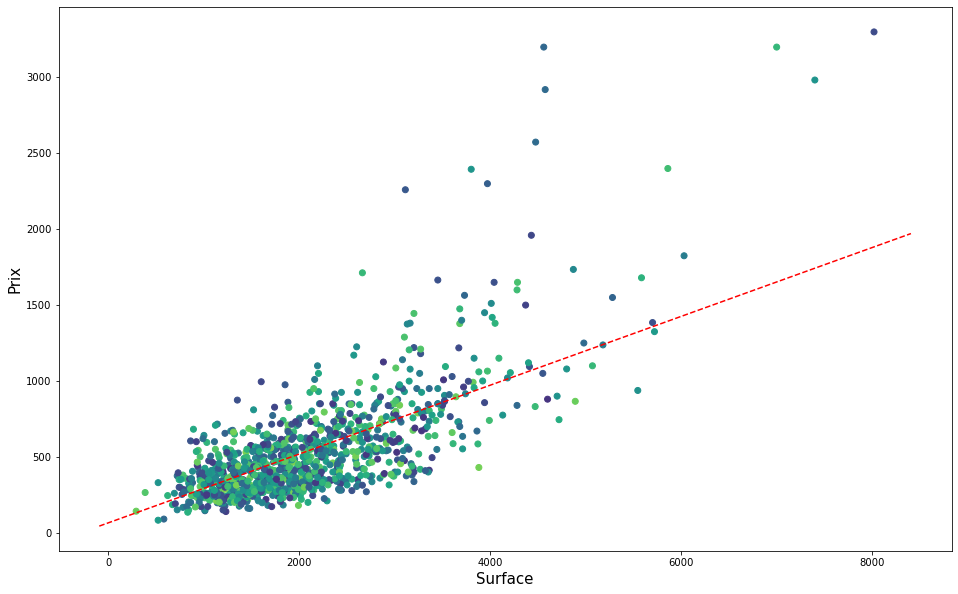

In [41]:
plot_line(slope_best, intercept_best, df)


🎉 **Great job**! By adding a non-zero intercept parameter, we have been able to reduce the MSE even more (Feel free to plot the regression line in your scatter plot to  confirm "visually" the approximate fit).

❓ However, what guarantees that these (`intercept_best`, `slope_best`) parameters are really the best ones? 

<details>
    <summary><i>👀 Explanations</i></summary>
    
We could maybe find an even better slope value by repeating step ①, this time fixing intercept at `intercept_best`! And then repeat step ② with the new slope to adjust the intercept again...
    
In order to find the global minimum of a 2-parameter function RMSE = f(slope, intercept), we may have to repeat step ① and ② indefinitely until values converge towards absolute minimums - and with no guarantee of success.
    
<img src='https://wagon-public-datasets.s3.amazonaws.com/data-science-images/decision-science/real-estate-minimizer.png'>
    
💪 You've just discovered one of the most fundamental aspects of machine learning: **iterative process for finding mimina**.  

👉 As you can guess, in the Data Scientist world, algorithms have been developed to automate and optimize such processes. In the next few weeks, you will discover the power of other algorithms such as **Gradient Descent**, and Python libaries such as `Stastmodels` that perform this iterative process for you. 

</details>



👉 Run the cells below if you are curious and want to find the real best slope and intercept for this dataset, computed using **Gradient Descent** 

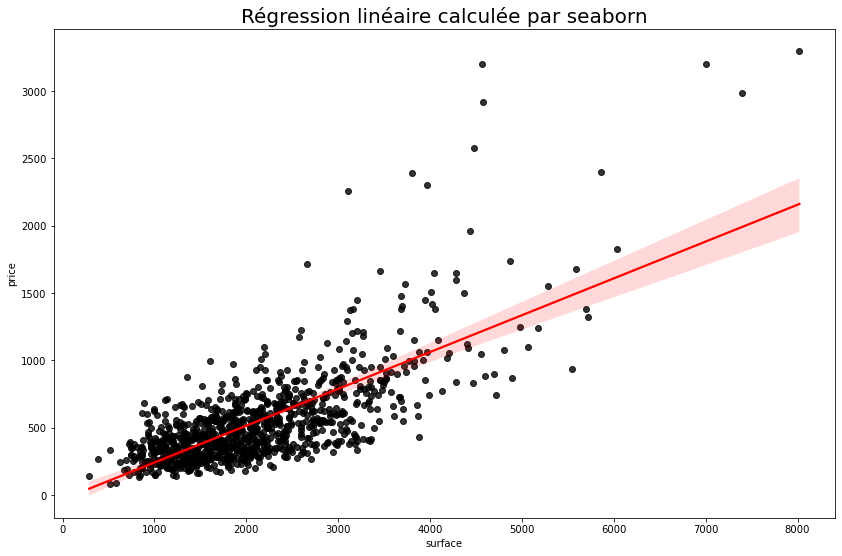

In [42]:
# plot the regression with seaborn

plt.figure(figsize=(14,9))
plt.title('Régression linéaire calculée par seaborn', fontsize=20)
sn.regplot(
    x = "surface",
    y = "price",
    scatter_kws={"color": "black"}, line_kws={"color": "red"},
    data = df)

plt.show()


In [43]:
# do a regression ols using statsmodels, exact solution)!
import statsmodels.api as sm

x = df['surface']
y = df['price']

x = sm.add_constant(x)

model = sm.OLS(y, x).fit()
predictions = model.predict(x) 

print_model = model.summary()
print(print_model)


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.537
Model:                            OLS   Adj. R-squared:                  0.537
Method:                 Least Squares   F-statistic:                     1157.
Date:                Sun, 06 Nov 2022   Prob (F-statistic):          4.68e-169
Time:                        14:32:50   Log-Likelihood:                -6907.5
No. Observations:                1000   AIC:                         1.382e+04
Df Residuals:                     998   BIC:                         1.383e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -33.3083     18.701     -1.781      0.0

**Adjusted. R-squared** reflects the fit of the model. R-squared values range from 0 to 1, where a higher value generally indicates a better fit, assuming certain conditions are met.

**const coefficient** is the Y-intercept.

**surface coefficient** represents the change in the output Y due to a change of one unit in surface

**std er** reflects the level of accuracy of the coefficients. The lower it is, the higher is the level of accuracy

❓ Let's go back to our initial question: What is your new prediction for the 5th flat below? How does it compare with your initial prediction based only on 4 flats? 

- `surface`: 3000 $ft^2$
- `bedrooms`: 5 
- `floors`: 1

In [44]:
# compute predicted price (Remember that the real price is 750,000$

flat_surface = 3000
predicted_price = slope_best * flat_surface + intercept_best
print("Le prix estimé est de {:.2f}$ ".format(predicted_price))

Le prix estimé est de 745.66$ 


☝️ It's better than our initial deterministic estimator based on only 4 flats, but obviously we are missing the information provided by the number of bedrooms and floors in this prediction!

## (3) Estimator with _all features_ (surface, bedrooms, floors)?

💡 A linear regression with three features (**Multivariate Linear Regression**) works the same way as with one feature, but instead of determining only 2 parameters to minimize RMSE (`intercept` and `slope`), we will need to find 4 parameters: $\hat{\theta}$ = (`intercept`, `slope_surface`, `slope_bedrooms`, `slope_floors`). 

----

🗓 There will be a lecture fully dedicated to **Multivariate Linear Regression**

----

🗓 The same **Gradient Descent** iterative method is applicable, and you will code it yourself by hand later during the training session.

👉 Meanwhile, feel free to run the cell below to see the final result of this multivariate regression:

In [45]:
# Find the four regression coefficients with statsmodels

x = df[['surface','bedrooms','floors']]
y = df['price']

x = sm.add_constant(x)

model = sm.OLS(y, x).fit()
predictions = model.predict(x) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.542
Model:                            OLS   Adj. R-squared:                  0.541
Method:                 Least Squares   F-statistic:                     393.4
Date:                Sun, 06 Nov 2022   Prob (F-statistic):          1.74e-168
Time:                        14:32:57   Log-Likelihood:                -6901.7
No. Observations:                1000   AIC:                         1.381e+04
Df Residuals:                     996   BIC:                         1.383e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.1549     28.400      0.639      0.5

🎉 Now that we have found the best parameters $\theta = \begin{bmatrix}
     \theta_0 \\
     \theta_1 \\
    \theta_2 \\
     \theta_3 \\
\end{bmatrix}_{4 \times 1} = 
\begin{bmatrix}
     \theta_{intercept} \\
     \theta_{surface}\\
    \theta_{bedrooms} \\
     \theta_{floors}
\end{bmatrix}_{4 \times 1} = 
\begin{bmatrix}
    18.154854 \\
    0.286953 \\
    -21.623564 \\
    -3.811868
\end{bmatrix}_{4 \times 1}
$, 

we can predict the price of the new flat with:
* $3000 ft^2$
* $5$ bedrooms
* located on the $1st$ floor

$$ \hat{y_5} = \theta_0 + \theta_1 \times 3000 + \theta_2 \times 5 + \theta_3 \times 1 $$

## (4) Concluding remarks on Linear Algebra 🧠

In [46]:
# Compute the newly predicted price for the 5th flat? Is this prediction better?

#YOUR CODE 
theta = np.array([[18.15489],[0.2870],[-21.6236],[-3.8119]])
x5 = np.array([[1,3000,5,1]])
y5 = np.matmul(x5,theta)

print("Le prix estimé est de {:.2f}$ ".format(y5[0][0]))

Le prix estimé est de 767.22$ 


# Conclusion :
My prediction is more accurate with one features.

This **optimisation problem** can be summarized as follows

- We need to find a vector of parameters $\hat{\theta} = \begin{bmatrix}
     \theta_{intercept} \\
     \theta_{surface}\\
    \theta_{bedrooms} \\
     \theta_{floors}
\end{bmatrix}_{4 \times 1}$ 

- That minimizes an error $e = \left\|X\hat{\theta} - Y \right\|^2$

- For a given matrix of features $X$ [constant, surfaces, floors, bedrooms]  $\begin{bmatrix}
    1 & 620 & 1 & 1 \\
    1 & 3280 & 4 & 2 \\
    ... \\
    1 & 1900 & 2 & 2 \\
    1 & 1320 & 3 & 3
   \end{bmatrix}_{n \times 4}
$

- and a vector of observations $Y = \begin{bmatrix}
           y_{1} \\
           y_{2} \\
           \vdots \\
           y_{1000}
         \end{bmatrix}$ (prices)

Such minimum $\large \hat{\theta}$ is reached when the "derivatives" of $e$, that is $ \large 2 X^T(X\hat{\theta}−Y)$ equals zero (👉proof during the Regression Module). 
    
In other words, we need to solve the linear system $\large (X^T X)\hat{\theta}=X^TY$. 
    
This linear has a unique solution provided that no column of X can be expressed as a linear combination of the others: in that case $ \large (X^TX)^{-1}$ is invertible and the minimum is reached when $\large \hat{\theta} = (X^TX)^{-1} X^T Y$. Notice how X does not need to be squared anymore compared to the first challenge 💪.

💥 However, keep in mind that ***inverting matrices is computationally complex***. That is why other methods have been developed to find the minimum of a function, such as ***gradient descent***.
    
📚 Read more on [Stats.StackExchange](https://stats.stackexchange.com/a/278779) if you are interested!
</details>


🏁 Congratulations! 

💾 Don't forget to `save` your notebook!